In [47]:
import pandas as pd
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import shap
import matplotlib.pyplot as plt
import seaborn
import matplotlib.cm as cm
import numpy as np

In [2]:
shap.initjs()

# Columns
    age: age in years
    sex: (1 = male; 0 = female)
    cp: chest pain type
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
    thalach: maximum heart rate achieved
    exang: exercise induced angina (1 = yes; 0 = no)
    oldpeak: ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    ca: number of major vessels (0-3) colored by flourosopy
    tha: l3 = normal; 6 = fixed defect; 7 = reversable defect
    target: 1 or 0

# Read in Data

In [3]:
heart_data = pd.read_csv('heart.csv')

In [4]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
heart_data.size

4242

# Get Basic Statistics for each column

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Correlations between each column

In [7]:
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


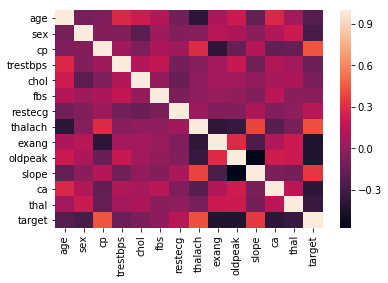

In [8]:
corr = heart_data.corr()
seaborn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [9]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
train, test = train_test_split(heart_data, test_size=0.2)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [12]:
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [13]:
train_features = train.loc[:, train.columns != 'target']
train_target = train.loc[:, train.columns == 'target']

# Create XGBoost Classifier

In [14]:
xgb_classifier = GradientBoostingClassifier(n_estimators = 1000, max_leaf_nodes = 4, 
                                            max_depth = None, random_state = 2,min_samples_split = 5)

In [94]:
import time
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import f1_score

clf = xgb.XGBClassifier()

param_grid = {
        'max_depth': [6, 10, 15, 20],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'n_estimators': [10,25,50,100,200]}

rs_clf = RandomizedSearchCV(xgb_classifier, param_grid, n_iter=60,
                            n_jobs=-1, verbose=2, cv=3,
                            scoring='f1', random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(train_features,train_target)
print("Randomized search time:", time.time() - search_time_start)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] subsample=0.7, n_estimators=50, max_depth=10 ....................
[CV] subsample=0.7, n_estimators=50, max_depth=10 ....................
[CV] subsample=0.7, n_estimators=50, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=1.0, n_estimators=50, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=1.0, n_estimators=50, max_depth=10 ....................
[CV] ..... subsample=0.7, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=1.0, n_estimators=50, max_depth=10 ....................
[CV] ..... subsample=0.7, n_estimators=50, max_depth=10, total=   0.1s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.9, n_estimators=10, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=0.9, n_estimators=10, max_depth=6 .....................
[CV] ...... subsample=0.9, n_estimators=10, max_depth=6, total=   0.0s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.9, n_estimators=10, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.9, n_estimators=10, max_depth=6, total=   0.0s
[CV] subsample=0.6, n_estimators=200, max_depth=10 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=50, max_depth=10, total=   0.1s
[CV] ...... subsample=0.9, n_estimators=10, max_depth=6, total=   0.0s
[CV] subsample=0.6, n_estimators=200, max_depth=10 ...................
[CV] subsample=0.7, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=0.7, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.6, n_estimators=200, max_depth=10, total=   0.3s
[CV] subsample=0.6, n_estimators=200, max_depth=10 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.6, n_estimators=200, max_depth=10, total=   0.3s
[CV] subsample=0.9, n_estimators=10, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=0.9, n_estimators=10, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=0.7, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=10, max_depth=15, total=   0.1s
[CV] subsample=0.9, n_estimators=10, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=10, max_depth=15, total=   0.1s
[CV] subsample=0.6, n_estimators=50, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=10, max_depth=15, total=   0.0s
[CV] subsample=0.6, n_estimators=50, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=50, max_depth=15, total=   0.1s
[CV] subsample=0.6, n_estimators=50, max_depth=15 ....................
[CV] ..... subsample=0.6, n_estimators=50, max_depth=15, total=   0.1s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.9, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.9, n_estimators=25, max_depth=6, total=   0.0s
[CV] subsample=0.9, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=50, max_depth=15, total=   0.1s
[CV] subsample=0.9, n_estimators=25, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.9, n_estimators=25, max_depth=6, total=   0.0s
[CV] subsample=0.9, n_estimators=25, max_depth=6 .....................
[CV] .... subsample=0.6, n_estimators=200, max_depth=10, total=   0.3s
[CV] subsample=0.9, n_estimators=25, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=25, max_depth=10, total=   0.0s
[CV] subsample=0.9, n_estimators=25, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=1.0, n_estimators=50, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.9, n_estimators=25, max_depth=6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, max_depth=6 ....................
[CV] ..... subsample=0.9, n_estimators=25, max_depth=10, total=   0.1s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=25, max_depth=10, total=   0.1s
[CV] subsample=1.0, n_estimators=50, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.5, n_estimators=100, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=50, max_depth=20, total=   0.1s
[CV] subsample=1.0, n_estimators=50, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=50, max_depth=20, total=   0.1s
[CV] subsample=0.7, n_estimators=10, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=10, max_depth=15, total=   0.0s
[CV] subsample=0.7, n_estimators=10, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=50, max_depth=20, total=   0.1s
[CV] subsample=1.0, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=10, max_depth=15, total=   0.0s
[CV] subsample=1.0, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=100, max_depth=6, total=   0.2s
[CV] subsample=0.5, n_estimators=100, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=100, max_depth=6, total=   0.2s
[CV] subsample=0.7, n_estimators=10, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=1.0, n_estimators=25, max_depth=6, total=   0.1s
[CV] subsample=1.0, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=10, max_depth=15, total=   0.0s
[CV] ...... subsample=1.0, n_estimators=25, max_depth=6, total=   0.1s
[CV] subsample=0.5, n_estimators=25, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.5, n_estimators=25, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=1.0, n_estimators=25, max_depth=6, total=   0.1s
[CV] subsample=1.0, n_estimators=200, max_depth=15 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=25, max_depth=10, total=   0.1s
[CV] subsample=1.0, n_estimators=200, max_depth=15 ...................
[CV] ..... subsample=0.5, n_estimators=25, max_depth=10, total=   0.0s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.5, n_estimators=25, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=100, max_depth=6, total=   0.2s
[CV] ..... subsample=0.5, n_estimators=25, max_depth=10, total=   0.0s
[CV] subsample=0.6, n_estimators=10, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.6, n_estimators=100, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=10, max_depth=20, total=   0.0s
[CV] subsample=0.6, n_estimators=10, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=10, max_depth=20, total=   0.0s
[CV] subsample=0.6, n_estimators=100, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.6, n_estimators=100, max_depth=20, total=   0.1s
[CV] subsample=0.6, n_estimators=100, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=1.0, n_estimators=200, max_depth=15, total=   0.3s
[CV] .... subsample=1.0, n_estimators=200, max_depth=15, total=   0.3s
[CV] subsample=1.0, n_estimators=200, max_depth=15 ...................
[CV] subsample=0.6, n_estimators=10, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=10, max_depth=20, total=   0.0s
[CV] subsample=0.5, n_estimators=10, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.6, n_estimators=100, max_depth=20, total=   0.2s
[CV] ...... subsample=0.5, n_estimators=10, max_depth=6, total=   0.0s
[CV] subsample=0.5, n_estimators=10, max_depth=6 .....................
[CV] subsample=0.5, n_estimators=10, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.5, n_estimators=10, max_depth=6, total=   0.0s
[CV] subsample=0.9, n_estimators=200, max_depth=15 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.5, n_estimators=10, max_depth=6, total=   0.0s
[CV] subsample=0.9, n_estimators=200, max_depth=15 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.6, n_estimators=100, max_depth=20, total=   0.2s
[CV] subsample=0.7, n_estimators=50, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=50, max_depth=20, total=   0.1s
[CV] subsample=0.7, n_estimators=50, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=1.0, n_estimators=200, max_depth=15, total=   0.3s
[CV] subsample=1.0, n_estimators=10, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=10, max_depth=15, total=   0.0s
[CV] subsample=1.0, n_estimators=10, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=10, max_depth=15, total=   0.0s
[CV] subsample=1.0, n_estimators=10, max_depth=15 ....................
[CV] ..... subsample=0.7, n_estimators=50, max_depth=20, total=   0.1s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.8, n_estimators=50, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=10, max_depth=15, total=   0.0s
[CV] subsample=0.8, n_estimators=50, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.9, n_estimators=200, max_depth=15, total=   0.4s
[CV] subsample=0.9, n_estimators=200, max_depth=15 ...................
[CV] ..... subsample=0.8, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=0.8, n_estimators=50, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.9, n_estimators=200, max_depth=15, total=   0.4s
[CV] subsample=0.7, n_estimators=50, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.8, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=0.6, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=10, max_depth=10, total=   0.0s
[CV] subsample=0.6, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.8, n_estimators=50, max_depth=10, total=   0.1s
[CV] ..... subsample=0.7, n_estimators=50, max_depth=20, total=   0.1s
[CV] subsample=0.6, n_estimators=10, max_depth=10 ....................
[CV] subsample=0.9, n_estimators=25, max_depth=15 ....................


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=10, max_depth=10, total=   0.0s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.5, n_estimators=50, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=10, max_depth=10, total=   0.0s
[CV] subsample=0.9, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=25, max_depth=15, total=   0.1s
[CV] subsample=0.9, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=25, max_depth=15, total=   0.0s
[CV] subsample=0.5, n_estimators=50, max_depth=10 ....................
[CV] ..... subsample=0.5, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=0.5, n_estimators=50, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=25, max_depth=15, total=   0.0s
[CV] subsample=0.5, n_estimators=50, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=0.5, n_estimators=50, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=0.8, n_estimators=50, max_depth=6 .....................
[CV] .... subsample=0.9, n_estimators=200, max_depth=15, total=   0.4s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.8, n_estimators=50, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.5, n_estimators=50, max_depth=6, total=   0.1s
[CV] subsample=0.5, n_estimators=50, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.8, n_estimators=50, max_depth=6, total=   0.1s
[CV] subsample=0.8, n_estimators=50, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.5, n_estimators=50, max_depth=6, total=   0.1s
[CV] ...... subsample=0.8, n_estimators=50, max_depth=6, total=   0.1s
[CV] subsample=0.5, n_estimators=200, max_depth=20 ...................
[CV] subsample=0.5, n_estimators=200, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.5, n_estimators=50, max_depth=6, total=   0.1s
[CV] subsample=0.9, n_estimators=50, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.8, n_estimators=50, max_depth=6, total=   0.1s
[CV] subsample=0.9, n_estimators=50, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=50, max_depth=15, total=   0.1s
[CV] subsample=0.9, n_estimators=50, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=50, max_depth=15, total=   0.1s
[CV] subsample=0.6, n_estimators=25, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=50, max_depth=15, total=   0.1s
[CV] subsample=0.6, n_estimators=25, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=25, max_depth=20, total=   0.0s
[CV] subsample=0.5, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=25, max_depth=20, total=   0.1s
[CV] subsample=0.6, n_estimators=25, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.5, n_estimators=200, max_depth=20, total=   0.3s
[CV] ..... subsample=0.6, n_estimators=25, max_depth=20, total=   0.0s
[CV] subsample=0.5, n_estimators=200, max_depth=6 ....................
[CV] .... subsample=0.5, n_estimators=200, max_depth=20, total=   0.4s
[CV] subsample=0.5, n_estimators=200, max_depth=20 ...................
[CV] subsample=0.5, n_estimators=100, max_depth=15 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.5, n_estimators=100, max_depth=15, total=   0.1s
[CV] subsample=0.5, n_estimators=100, max_depth=15 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=0.5, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, max_depth=15 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.5, n_estimators=200, max_depth=20, total=   0.3s
[CV] subsample=0.9, n_estimators=100, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.5, n_estimators=100, max_depth=15, total=   0.2s
[CV] subsample=0.9, n_estimators=100, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.5, n_estimators=100, max_depth=15, total=   0.2s
[CV] subsample=0.5, n_estimators=25, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=100, max_depth=6, total=   0.2s
[CV] subsample=0.9, n_estimators=100, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=25, max_depth=20, total=   0.1s
[CV] subsample=0.5, n_estimators=25, max_depth=20 ....................
[CV] ..... subsample=0.9, n_estimators=100, max_depth=6, total=   0.2s
[CV] subsample=0.5, n_estimators=25, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=200, max_depth=6, total=   0.4s
[CV] subsample=0.7, n_estimators=200, max_depth=10 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=25, max_depth=20, total=   0.1s
[CV] subsample=0.7, n_estimators=200, max_depth=10 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=25, max_depth=20, total=   0.1s
[CV] subsample=0.7, n_estimators=100, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=100, max_depth=6, total=   0.2s
[CV] subsample=0.5, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=10, max_depth=10, total=   0.0s
[CV] subsample=0.5, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=10, max_depth=10, total=   0.0s
[CV] subsample=0.5, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.7, n_estimators=100, max_depth=20, total=   0.2s
[CV] subsample=0.7, n_estimators=100, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=10, max_depth=10, total=   0.0s
[CV] subsample=1.0, n_estimators=100, max_depth=10 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.7, n_estimators=200, max_depth=10, total=   0.4s
[CV] subsample=0.7, n_estimators=200, max_depth=10 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.7, n_estimators=200, max_depth=10, total=   0.4s
[CV] subsample=0.7, n_estimators=100, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.7, n_estimators=100, max_depth=20, total=   0.2s
[CV] .... subsample=1.0, n_estimators=100, max_depth=10, total=   0.1s
[CV] subsample=1.0, n_estimators=100, max_depth=10 ...................
[CV] subsample=0.9, n_estimators=200, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=1.0, n_estimators=100, max_depth=10, total=   0.1s
[CV] subsample=1.0, n_estimators=100, max_depth=10 ...................
[CV] .... subsample=0.7, n_estimators=100, max_depth=20, total=   0.2s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.9, n_estimators=200, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.7, n_estimators=200, max_depth=10, total=   0.3s
[CV] subsample=0.8, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=1.0, n_estimators=100, max_depth=10, total=   0.1s
[CV] subsample=0.8, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.8, n_estimators=25, max_depth=6, total=   0.1s
[CV] subsample=0.8, n_estimators=25, max_depth=6 .....................
[CV] ..... subsample=0.8, n_estimators=10, max_depth=10, total=   0.0s


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.8, n_estimators=10, max_depth=10 ....................
[CV] .... subsample=0.9, n_estimators=200, max_depth=20, total=   0.3s
[CV] subsample=0.9, n_estimators=200, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.8, n_estimators=10, max_depth=10, total=   0.0s
[CV] subsample=0.8, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.8, n_estimators=25, max_depth=6, total=   0.1s
[CV] ..... subsample=0.8, n_estimators=10, max_depth=10, total=   0.0s
[CV] subsample=0.6, n_estimators=200, max_depth=6 ....................
[CV] subsample=0.6, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.9, n_estimators=200, max_depth=20, total=   0.4s
[CV] subsample=0.8, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.8, n_estimators=25, max_depth=6, total=   0.0s
[CV] subsample=0.8, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.8, n_estimators=25, max_depth=15, total=   0.1s
[CV] subsample=0.8, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.8, n_estimators=25, max_depth=15, total=   0.0s
[CV] subsample=0.8, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.9, n_estimators=200, max_depth=20, total=   0.4s
[CV] subsample=0.9, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=0.6, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.8, n_estimators=25, max_depth=15, total=   0.1s
[CV] ..... subsample=0.6, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=0.9, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] subsample=0.7, n_estimators=25, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=25, max_depth=20, total=   0.0s
[CV] subsample=0.7, n_estimators=25, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=25, max_depth=20, total=   0.0s
[CV] subsample=0.7, n_estimators=25, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=25, max_depth=20, total=   0.0s
[CV] subsample=0.6, n_estimators=200, max_depth=15 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=0.9, n_estimators=200, max_depth=6 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=0.6, n_estimators=200, max_depth=15 ...................
[CV] ..... subsample=0.9, n_estimators=200, max_depth=6, total=   0.3s
[CV] subsample=1.0, n_estimators=10, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=1.0, n_estimators=10, max_depth=6, total=   0.0s
[CV] subsample=1.0, n_estimators=10, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=1.0, n_estimators=10, max_depth=6, total=   0.0s
[CV] subsample=1.0, n_estimators=10, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=1.0, n_estimators=10, max_depth=6, total=   0.0s
[CV] subsample=0.5, n_estimators=10, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=10, max_depth=20, total=   0.0s
[CV] subsample=0.5, n_estimators=10, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=10, max_depth=20, total=   0.0s
[CV] subsample=0.5, n_estimators=10, max_depth=20 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.6, n_estimators=200, max_depth=15, total=   0.4s
[CV] subsample=0.7, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=10, max_depth=20, total=   0.0s
[CV] subsample=0.7, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=25, max_depth=15, total=   0.0s
[CV] subsample=0.7, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=25, max_depth=15, total=   0.1s
[CV] ..... subsample=0.9, n_estimators=200, max_depth=6, total=   0.4s
[CV] subsample=0.8, n_estimators=25, max_depth=10 ....................
[CV] subsample=0.8, n_estimators=25, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.7, n_estimators=25, max_depth=15, total=   0.1s
[CV] .... subsample=0.6, n_estimators=200, max_depth=15, total=   0.4s
[CV] subsample=0.6, n_estimators=200, max_depth=15 ...................
[CV] subsample=0.6, n_estimators=100, max_depth=10 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.8, n_estimators=25, max_depth=10, total=   0.1s
[CV] subsample=0.6, n_estimators=100, max_depth=10 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.8, n_estimators=25, max_depth=10, total=   0.1s
[CV] subsample=0.8, n_estimators=25, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.8, n_estimators=25, max_depth=10, total=   0.0s
[CV] subsample=1.0, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=10, max_depth=10, total=   0.0s
[CV] subsample=1.0, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=10, max_depth=10, total=   0.0s
[CV] .... subsample=0.6, n_estimators=100, max_depth=10, total=   0.2s
[CV] subsample=0.9, n_estimators=50, max_depth=6 .....................
[CV] subsample=0.6, n_estimators=100, max_depth=10 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.6, n_estimators=100, max_depth=10, total=   0.2s
[CV] subsample=1.0, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=1.0, n_estimators=10, max_depth=10, total=   0.0s
[CV] subsample=0.9, n_estimators=50, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.9, n_estimators=50, max_depth=6, total=   0.1s
[CV] subsample=0.9, n_estimators=50, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.6, n_estimators=200, max_depth=15, total=   0.3s
[CV] subsample=0.5, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.9, n_estimators=50, max_depth=6, total=   0.1s
[CV] subsample=0.5, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=0.6, n_estimators=100, max_depth=10, total=   0.2s
[CV] subsample=0.9, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=10, max_depth=10, total=   0.0s
[CV] ...... subsample=0.9, n_estimators=50, max_depth=6, total=   0.1s
[CV] subsample=0.9, n_estimators=10, max_depth=10 ....................
[CV] subsample=0.9, n_estimators=10, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=25, max_depth=15, total=   0.1s
[CV] subsample=0.5, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=10, max_depth=10, total=   0.0s
[CV] ..... subsample=0.5, n_estimators=25, max_depth=15, total=   0.1s
[CV] subsample=1.0, n_estimators=100, max_depth=20 ...................
[CV] subsample=1.0, n_estimators=100, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.9, n_estimators=10, max_depth=10, total=   0.1s
[CV] subsample=0.6, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=25, max_depth=15, total=   0.1s
[CV] subsample=0.6, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.6, n_estimators=25, max_depth=6, total=   0.0s
[CV] subsample=0.6, n_estimators=25, max_depth=6 .....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.6, n_estimators=25, max_depth=6, total=   0.0s
[CV] subsample=0.6, n_estimators=50, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... subsample=0.6, n_estimators=25, max_depth=6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, max_depth=10 ....................
[CV] .... subsample=1.0, n_estimators=100, max_depth=20, total=   0.1s
[CV] subsample=1.0, n_estimators=100, max_depth=20 ...................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=1.0, n_estimators=100, max_depth=20, total=   0.2s
[CV] subsample=0.5, n_estimators=50, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=0.5, n_estimators=50, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=50, max_depth=10, total=   0.1s
[CV] subsample=0.6, n_estimators=50, max_depth=10 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=50, max_depth=15, total=   0.1s
[CV] subsample=0.5, n_estimators=50, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... subsample=1.0, n_estimators=100, max_depth=20, total=   0.2s
[CV] subsample=0.6, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=50, max_depth=15, total=   0.1s
[CV] subsample=0.6, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.6, n_estimators=50, max_depth=10, total=   0.1s
[CV] ..... subsample=0.6, n_estimators=25, max_depth=15, total=   0.1s
[CV] subsample=0.6, n_estimators=25, max_depth=15 ....................


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... subsample=0.5, n_estimators=50, max_depth=15, total=   0.1s
[CV] ..... subsample=0.6, n_estimators=25, max_depth=15, total=   0.1s
[CV] ..... subsample=0.6, n_estimators=25, max_depth=15, total=   0.0s
Randomized search time: 6.446218013763428
Best score: 0.8644153584562458
Best params: 
max_depth: 20
n_estimators: 25
subsample: 0.7


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.2s finished
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
xgb_classifier.fit(train_features,train_target)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=None,
              max_features=None, max_leaf_nodes=4,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)

In [16]:
test_features = test.loc[:, test.columns != 'target']
test_target = test.loc[:, test.columns == 'target']

In [17]:
predictions = rs_clf.predict(test_features)

In [18]:
metrics.accuracy_score(test_target,predictions)

0.7049180327868853

In [19]:
metrics.classification_report(test_target,predictions)

'             precision    recall  f1-score   support\n\n          0       0.72      0.68      0.70        31\n          1       0.69      0.73      0.71        30\n\navg / total       0.71      0.70      0.70        61\n'

In [20]:
metrics.confusion_matrix(test_target,predictions)

array([[21, 10],
       [ 8, 22]])

In [95]:
random_search_pred = rs_clf.predict(test_features)

In [96]:
metrics.accuracy_score(test_target,random_search_pred)

0.7540983606557377

In [97]:
metrics.classification_report(test_target,random_search_pred)

'             precision    recall  f1-score   support\n\n          0       0.79      0.71      0.75        31\n          1       0.73      0.80      0.76        30\n\navg / total       0.76      0.75      0.75        61\n'

# Explanations

In [21]:
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(train_features)

In [22]:
shap.force_plot(explainer.expected_value, shap_values[0,:], train_features.iloc[0,:])

In [23]:
shap.force_plot(explainer.expected_value, shap_values, train_features)

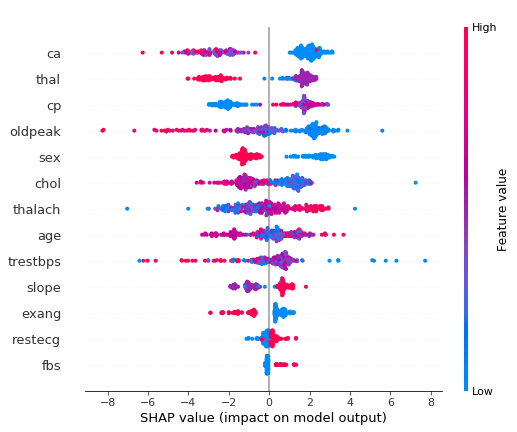

In [24]:
shap.summary_plot(shap_values, train_features)

# RandomForest

In [25]:
rf = RandomForestClassifier()
rf.fit(train_features,train_target)
rf_predictions = rf.predict(test_features)
print(metrics.accuracy_score(test_target,rf_predictions))
print(metrics.classification_report(test_target,rf_predictions))
metrics.confusion_matrix(test_target,rf_predictions)

0.7213114754098361
             precision    recall  f1-score   support

          0       0.73      0.71      0.72        31
          1       0.71      0.73      0.72        30

avg / total       0.72      0.72      0.72        61



/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([[22,  9],
       [ 8, 22]])

In [32]:
for i in range(len(heart_data.columns)-1):
    print(str(heart_data.columns[i]) + ": " + str(rf.feature_importances_[i]))

age: 0.09099862847585799
sex: 0.03707179105520365
cp: 0.12644114653150812
trestbps: 0.05872737436548199
chol: 0.08067727098026758
fbs: 0.009696301075841468
restecg: 0.024392413444685304
thalach: 0.08513287526329713
exang: 0.05052407984705428
oldpeak: 0.10339497446379613
slope: 0.07005135405535437
ca: 0.07223458546287134
thal: 0.1906572049787807


In [26]:
rf.feature_importances_

array([0.09099863, 0.03707179, 0.12644115, 0.05872737, 0.08067727,
       0.0096963 , 0.02439241, 0.08513288, 0.05052408, 0.10339497,
       0.07005135, 0.07223459, 0.1906572 ])

# SVM

In [ ]:
svc = svm.SVC(kernel='poly', C=1, gamma=1)
svc.fit(train_features,train_target)
svm_predictions = svc.predict(test_features)
print(metrics.accuracy_score(test_target,svm_predictions))
print(metrics.classification_report(test_target,svm_predictions))
metrics.confusion_matrix(test_target,svm_predictions)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# PCA

In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler

# Without Standardizing DAta

In [57]:
pca = PCA(n_components=2)
pca.fit(heart_data)
projected = pca.transform(heart_data)

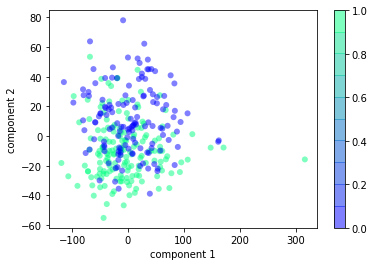

In [58]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=heart_data.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# With Standardizingm

In [59]:
pca = PCA(n_components=2)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(heart_data)
pca.fit(scaled_data)
projected = pca.transform(scaled_data)

In [42]:
print(pca.explained_variance_)

[3.31240732 1.57737062]


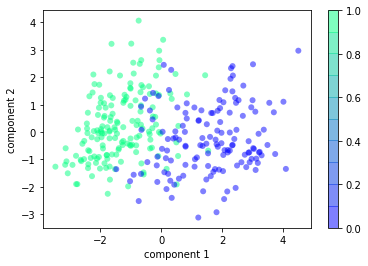

In [60]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=heart_data.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [39]:
X

array([[-5.17391076e-02,  2.62402204e+00],
       [-8.17440594e-01, -7.30374576e-01],
       [-2.05759932e+00, -3.90984463e-02],
       [-1.90304318e+00, -5.96700877e-01],
       [-7.68370620e-01,  4.12545496e-01],
       [-1.00063986e+00, -2.33692414e-01],
       [-5.91350471e-01,  1.63794959e+00],
       [-2.00195499e+00, -1.32964375e+00],
       [-1.23612315e+00,  1.06805571e+00],
       [-1.69086932e+00,  1.84121933e-02],
       [-1.10288020e+00, -4.16413123e-01],
       [-2.06867462e+00,  6.26420387e-01],
       [-1.91311753e+00, -4.82444305e-01],
       [-1.88544760e-02, -5.27645548e-02],
       [-1.62380811e+00,  3.22097662e+00],
       [-1.52544131e+00,  1.76529041e-01],
       [-2.34955098e+00,  1.30681292e+00],
       [ 4.74312110e-01,  2.12016032e+00],
       [-1.39313353e+00, -6.41479881e-01],
       [-8.96394228e-01,  2.13680646e+00],
       [-3.59960913e-01, -5.98388497e-01],
       [-1.85472938e+00, -1.13950739e+00],
       [-2.13339648e+00, -1.12381929e+00],
       [ 3.